# Hamlet AI 📖

## "To be or not to be {a positive review}, that is the question"

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Chapter 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

### Potential ML Problems for Given Datasets
#### Adult Data
Predict binary income of adult given demographic data.
This would be a supervised binary classification problem.
#### AirBnB Data
Predict price of AirBnB given information about it's listing.
This would be a supervised learning regression problem.
#### WHR Data
Predict the country of an example with socioeconomic data.
This would be a supervised clustering classification problem.
#### Book Review Data
Predict if a book review is positive or negative.
This would be a supervised sentiment analysis binary classification problem.

In [2]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

print(df.shape)

(1973, 2)


## Chapter 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### 1. Book Review Dataset
In this project we will investigate the Book Reviews dataset. The dataset consists of 1973 rows with two columns -- one with the raw text review and the another indicating if the review is positive or negative.
#### 2. Predicting Sentiment
Given this dataset, a suitable machine learning problem is predicting if a book review is contains positive or negative sentiment. Our label will be the "Positive Review" column which indicates if a review is positive or not. 

Once we build an accurate model for predicting book review sentiment, we will generalize our model to other categories of review data.
#### 3. Supervised Learning
In order to solve this problem our model will use supervised learning and be trained with a label. Some preproccessng will be required to turn raw text into numerical data. This model will be solving a binary classification problem, the prediction will either be that the review is positive or negative. 
#### 4. Application in Real World
This model can be applied by mutliple stakeholders in the real world in various use cases. A book reviewer can run a potential review through the model to see if it comes across as negative or positive and utilize in trying aim for a clearly skewed or middle ground review. Then, book review platforms like GoodReads and StoryGraph can use the model to assign star ratings to a book review with a missing rating. Lastly, book publishing companies can use this model to scrape reviews from these platforms and gather sentiment predictions to see if a book is being well recieved. 

<div>
    <img src="https://leehallwriter.com/wp-content/uploads/2021/03/gr-.jpg" width=200/>
    <img src="https://d3.harvard.edu/platform-digit/wp-content/uploads/sites/2/2022/10/penguin-random-house.jpg" width=250/>
</div>

When we generalize our model to other review data, Hamlet AI becomes even more powerful. Hamlet AI can be applied to a multitude of industries including Hollywood and social networks.

## Chapter 3: Understand Your Data

In [3]:
print("Explore if there are Missing Values")
print(df.isna().sum(axis=0))

Explore if there are Missing Values
Review             0
Positive Review    0
dtype: int64


In [4]:
print("Explore if Dataset is Class Balanced")
np.size(np.where(df['Positive Review'] == True)[0]) / df['Positive Review'].shape[0]

Explore if Dataset is Class Balanced


0.496705524581855

In [5]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

reviews = " ".join(review for review in df['Review'])
print("Total words in all reviews: ", len(reviews))
stopwords = set(STOPWORDS)
print(stopwords)

Total words in all reviews:  1843444
{'get', 'where', 'having', "that's", 'because', 'more', 'was', 'with', 'both', 'no', 'www', 'up', 'like', 'against', 'when', 'on', "won't", "doesn't", 'therefore', 'during', "we're", "here's", "i'd", 'its', 'else', "hadn't", 'this', 'can', 'if', 'over', 'into', 'few', 'for', 'ours', 'all', 'or', 'then', "i've", 'but', 'which', "why's", 'itself', 'her', 'yourself', 'to', 'does', "can't", 'between', 'than', "they've", 'from', 'hence', 'as', 'did', 'yourselves', 'most', "he'd", 'myself', 'his', 'below', 'nor', 'com', 'ought', 'those', 'herself', 'some', 'too', "mustn't", "i'll", 'him', 'me', 'your', 'other', "we'll", 'theirs', 'you', "we've", "couldn't", 'http', "we'd", 'again', 'do', 'ourselves', "wasn't", "they'll", 'further', 'been', 'once', 'about', 'their', 'of', 'who', 'above', 'ever', 'we', 'himself', "it's", "when's", 'at', 'r', 'shall', 'why', 'how', 'is', 'that', "there's", "haven't", 'only', 'these', 'could', 'in', "you'd", "he'll", "i'm", '

Wordcloud for Book Reviews


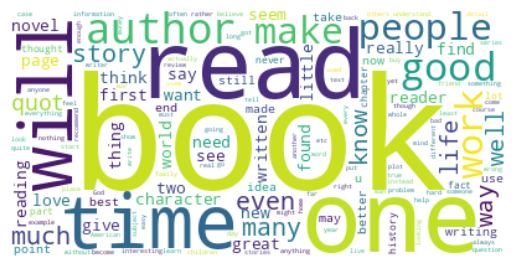

In [7]:
print("Wordcloud for Book Reviews")
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Chapter 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Our sentiment anlysis model will likely rely on finding keywords rather than gaining a deep contextual understanding, therefore a good pre-processing step is lemmetization. This will reduce words to their dictionary form. We will also remove stop words (words with little additive meaning) to reduce noise in our model. 

Once we have preprocessed our text reviews we will need to vectorize them. In this step we will find the optimal vectorizer (TF-IDF, BoW, etc.) which will transofrm our data into numerical data that can be fed into our model. Our model will be a Deep Averaging Neural Network (DAN). A DAN averages the input text into a fixed-size vector and feeds it through a dense network for classification. 

We will split our data into test, training, and validation sets. We will compile the model with an optimizer and loss function and train it with a set number of epohcs. After training we will visualize training performance by plotting testing and validation accuracy and loss over time. This will allow us to gauge if the model is underfitting or overfitting. Depending on the results we can tweek the layers of our DAN and other hyperparameters to increase accuracy and decreases differences in testing and validation metrics. 

Finally we fit our model the the testing dataset and visualize it's performance using a confusion matrix and by observing specific test cases. 

## Chapter 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
!pip install spacy
!pip install gensim
!python -m spacy download en_core_web_sm
from typing_extensions import Self
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2024-08-01 02:54:19.314710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 02:54:19.314738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [9]:
nlp = spacy.load('en_core_web_sm')
def lemmatize_review(review):
    doc = nlp(review)
    return ' '.join([token.lemma_ for token in doc if not token.is_punct])


t0 = time.time()
df['lemmatized_review'] = df['Review'].apply(lemmatize_review)
print('Original Review: ', df['Review'][0])
print('\n')
print('Lemmatized Review: ', df['lemmatized_review'][0])
t1 = time.time() 
print('Lemmatization Elapsed time: %.2fs' % (t1-t0))

Original Review:  This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot



Lemmatized Review:  this be perhaps the good of Johannes Steinhoff 's book since it do not   deal with his own stellar yet tragic WW II and post war career the   insight of the average person live in Germany be of great importance to   both social and military historian alike Steinhoff offer this   collective testament as a warning to all of we regard war and the rise   of a dictator as Johannes say in an interview quot;It be always the   civilian who suffer the most yet 

In [10]:
X = df['lemmatized_review']
y = df['Positive Review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [11]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
tfidf_vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(tfidf_vocabulary_size)

15171


In [12]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
count_vocabulary_size = len(count_vectorizer.vocabulary_)
print(count_vocabulary_size)

15171


In [13]:
from gensim.models import Word2Vec

w2v_vector_size = 300
word2vec_model = Word2Vec(sentences=X_train, vector_size=w2v_vector_size, workers=4)

def get_average_word2vec(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)
X_train_w2v = np.array([get_average_word2vec(doc, word2vec_model) for doc in X_train])
X_test_w2v = np.array([get_average_word2vec(doc, word2vec_model) for doc in X_test])
w2v_vocabulary_size = w2v_vector_size

print(X_train_w2v.shape)

(1479, 300)


In [14]:
def create_deep_averaging_neural_network(vocab_size, summarize):
    nn_model = keras.Sequential()
    
    input_layer = keras.layers.InputLayer(input_shape=(vocab_size,))
    nn_model.add(input_layer)
    
    hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
    nn_model.add(hidden_layer_1)
    
    dropout = keras.layers.Dropout(0.25, seed=123)
    nn_model.add(dropout)
    
    hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
    nn_model.add(hidden_layer_2)
    
    nn_model.add(dropout)
    
    hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
    nn_model.add(hidden_layer_3)
    
    nn_model.add(dropout)
    
    output_layer = keras.layers.Dense(units=1, activation='sigmoid')
    nn_model.add(output_layer)

    if summarize:
        nn_model.summary()

    return nn_model

In [15]:
nn_model_tfidf = create_deep_averaging_neural_network(tfidf_vocabulary_size, True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                971008    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 973,633
Trainable params: 973,633
Non-trainable params: 0
_________________________________________________________________


2024-08-01 02:55:06.309000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-01 02:55:06.309028: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-01 02:55:06.309088: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-08d115540c84f6070): /proc/driver/nvidia/version does not exist
2024-08-01 02:55:06.309286: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
nn_model_count = create_deep_averaging_neural_network(count_vocabulary_size, True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                971008    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 973,633
Trainable params: 973,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
nn_model_w2v = create_deep_averaging_neural_network(w2v_vocabulary_size, True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


In [18]:
models = [
    ["TFIDF Vectorization", nn_model_tfidf, X_train_tfidf.toarray(), X_test_tfidf.toarray()],
    ["Count Vectorization", nn_model_count, X_train_count.toarray(), X_test_count.toarray()], 
    ["Word2Vectorization", nn_model_w2v, X_train_w2v, X_test_w2v]
]

In [19]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
        
    def on_epoch_end(self, epoch, logs=None): 
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs) 
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                for k, v in logs.items()] 
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [20]:
def train_dan_model(model, X_train_array, y_train, epochs, callback):
    t0 = time.time() 
    
    num_epochs = epochs

    c = [ProgBarLoggerNEpochs(num_epochs, every_n=5)] if callback else None
    history = model.fit(
        X_train_array,
        y_train,
        epochs=num_epochs,
        verbose=0, 
        validation_split=0.2,
        callbacks=c,
    )
    
    t1 = time.time() 
    print('Elapsed time: %.2fs' % (t1-t0))

    return history

In [21]:
def plot_loss_accuracy_over_epochs(num_epochs, history):
    plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'],label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

TFIDF Vectorization


2024-08-01 02:55:06.990917: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-01 02:55:06.994641: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [5/ 45], Loss: 0.6929, Accuracy: 0.5038, Val_loss: 0.6928, Val_accuracy: 0.5034
Epoch [10/ 45], Loss: 0.6915, Accuracy: 0.5393, Val_loss: 0.6917, Val_accuracy: 0.6014
Epoch [15/ 45], Loss: 0.6885, Accuracy: 0.5714, Val_loss: 0.6895, Val_accuracy: 0.6554
Epoch [20/ 45], Loss: 0.6832, Accuracy: 0.6306, Val_loss: 0.6859, Val_accuracy: 0.7128
Epoch [25/ 45], Loss: 0.6753, Accuracy: 0.6847, Val_loss: 0.6799, Val_accuracy: 0.6926
Epoch [30/ 45], Loss: 0.6597, Accuracy: 0.7160, Val_loss: 0.6673, Val_accuracy: 0.7601
Epoch [35/ 45], Loss: 0.6273, Accuracy: 0.7633, Val_loss: 0.6438, Val_accuracy: 0.7770
Epoch [40/ 45], Loss: 0.5600, Accuracy: 0.8140, Val_loss: 0.5980, Val_accuracy: 0.7804
Epoch [45/ 45], Loss: 0.4660, Accuracy: 0.8445, Val_loss: 0.5262, Val_accuracy: 0.8041
Elapsed time: 4.13s


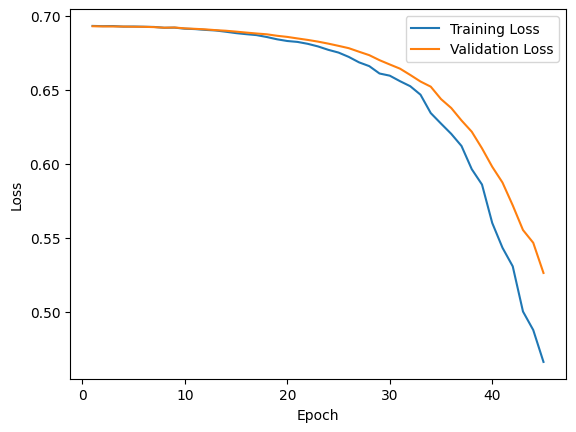

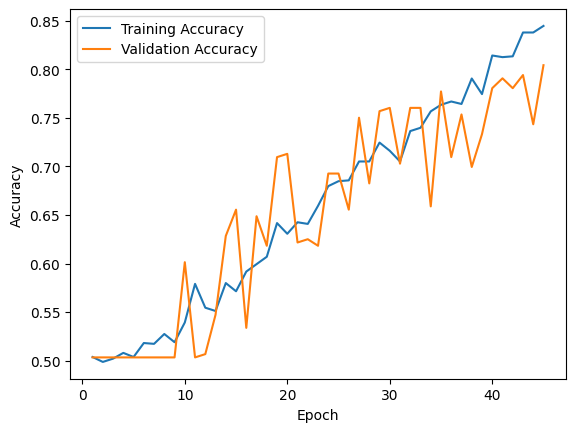

16/16 [==============================] - 0s 942us/step - loss: 0.5281 - accuracy: 0.7692
Test Loss: 0.5281
Test Accuracy: 0.7692
Count Vectorization
Epoch [5/ 45], Loss: 0.6726, Accuracy: 0.5850, Val_loss: 0.6480, Val_accuracy: 0.6959
Epoch [10/ 45], Loss: 0.6318, Accuracy: 0.6729, Val_loss: 0.6099, Val_accuracy: 0.7196
Epoch [15/ 45], Loss: 0.5747, Accuracy: 0.7439, Val_loss: 0.5686, Val_accuracy: 0.7297
Epoch [20/ 45], Loss: 0.5159, Accuracy: 0.7650, Val_loss: 0.5430, Val_accuracy: 0.7534
Epoch [25/ 45], Loss: 0.4737, Accuracy: 0.8014, Val_loss: 0.5210, Val_accuracy: 0.7736
Epoch [30/ 45], Loss: 0.3991, Accuracy: 0.8276, Val_loss: 0.5846, Val_accuracy: 0.6723
Epoch [35/ 45], Loss: 0.4226, Accuracy: 0.8199, Val_loss: 0.6327, Val_accuracy: 0.6959
Epoch [40/ 45], Loss: 0.3553, Accuracy: 0.8724, Val_loss: 0.5979, Val_accuracy: 0.7162
Epoch [45/ 45], Loss: 0.2819, Accuracy: 0.8833, Val_loss: 0.6581, Val_accuracy: 0.7534
Elapsed time: 4.60s


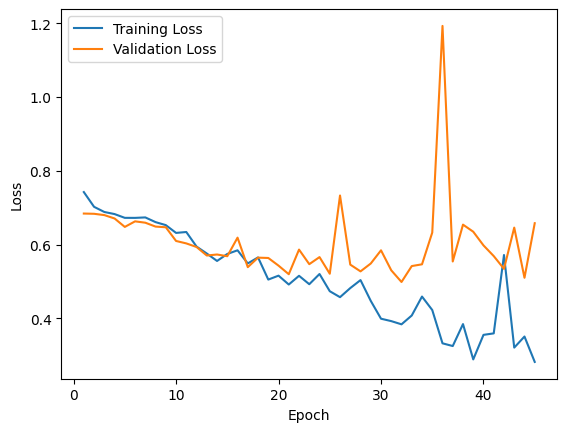

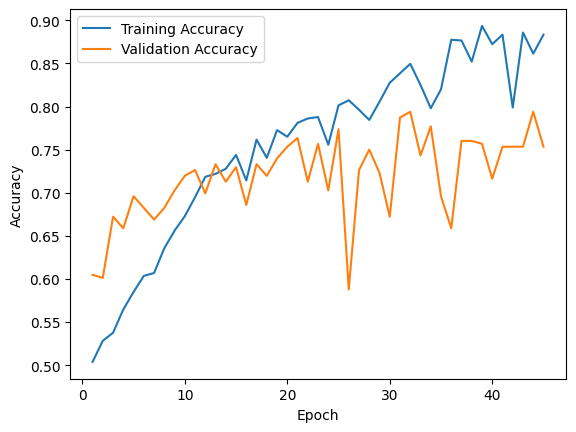

16/16 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.7166
Test Loss: 0.7305
Test Accuracy: 0.7166
Word2Vectorization
Epoch [5/ 45], Loss: 0.6938, Accuracy: 0.5063, Val_loss: 0.6929, Val_accuracy: 0.5034
Epoch [10/ 45], Loss: 0.6940, Accuracy: 0.4835, Val_loss: 0.6928, Val_accuracy: 0.5135
Epoch [15/ 45], Loss: 0.6928, Accuracy: 0.4945, Val_loss: 0.6931, Val_accuracy: 0.5338
Epoch [20/ 45], Loss: 0.6935, Accuracy: 0.5123, Val_loss: 0.6929, Val_accuracy: 0.5541
Epoch [25/ 45], Loss: 0.6927, Accuracy: 0.5021, Val_loss: 0.6926, Val_accuracy: 0.5000
Epoch [30/ 45], Loss: 0.6931, Accuracy: 0.5114, Val_loss: 0.6926, Val_accuracy: 0.5676
Epoch [35/ 45], Loss: 0.6932, Accuracy: 0.5021, Val_loss: 0.6927, Val_accuracy: 0.5304
Epoch [40/ 45], Loss: 0.6928, Accuracy: 0.5199, Val_loss: 0.6927, Val_accuracy: 0.5608
Epoch [45/ 45], Loss: 0.6924, Accuracy: 0.5182, Val_loss: 0.6927, Val_accuracy: 0.5034
Elapsed time: 1.90s


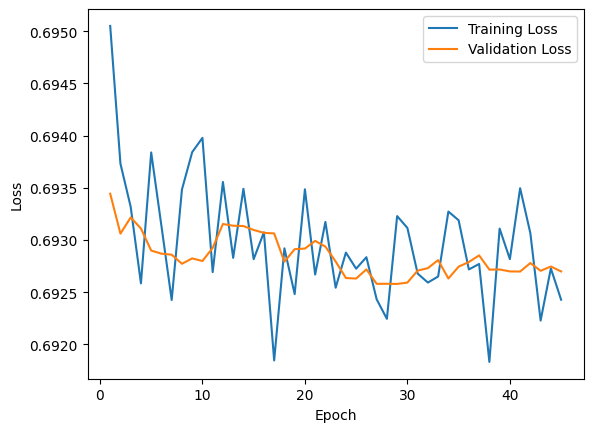

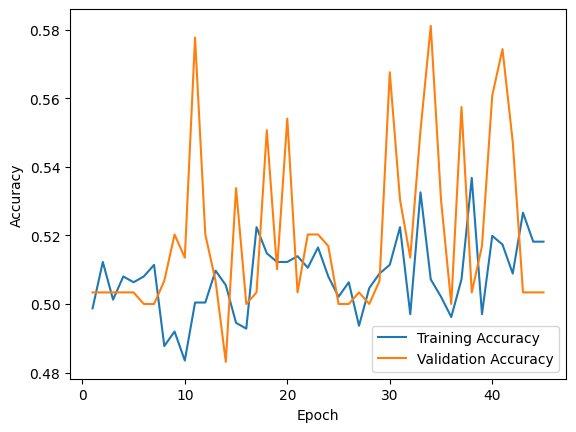

16/16 [==============================] - 0s 515us/step - loss: 0.6926 - accuracy: 0.4919
Test Loss: 0.6926
Test Accuracy: 0.4919


In [22]:
training_epochs = 45
lr = 0.03
model_accuracies = []

for model in models:
    title = model[0]
    nn = model[1]
    X_train = model[2]
    X_test = model[3]
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate=lr)
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    nn.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

    print("========================================================================================")
    print(title)
    training_history = train_dan_model(nn, X_train, y_train, training_epochs, True)
    
    plot_loss_accuracy_over_epochs(training_epochs, training_history)

    loss, accuracy = nn.evaluate(X_test, y_test)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')

    model_accuracies.append({"title": title,"accuracy": accuracy})

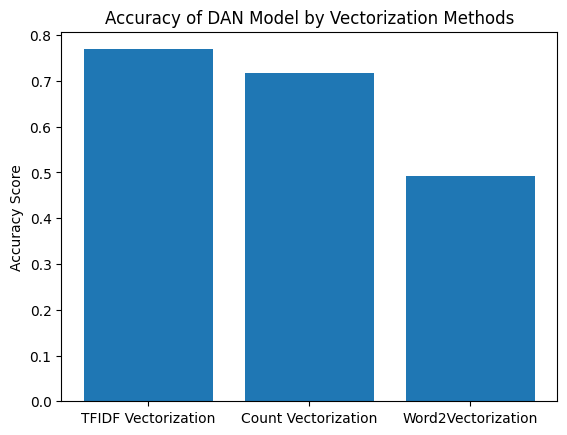

In [23]:
titles = []
accuracies = []
for point in model_accuracies:
    titles.append(point["title"])
    accuracies.append(point["accuracy"])

fig, ax = plt.subplots()

ax.bar(titles, accuracies)

ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy of DAN Model by Vectorization Methods')
plt.show()

In [24]:
best_model = create_deep_averaging_neural_network(tfidf_vocabulary_size, True)

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.03)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
best_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

train_dan_model(best_model, X_train_tfidf.toarray(), y_train, 45, True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                971008    
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 973,633
Trainable params: 973,633
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 45], Loss: 0.6921, Accuracy: 0.5376, Val_loss: 0.6923, Val_accuracy: 0.5034
Epoch [10/ 45], Loss: 0.6874

Text(0.5, 1.0, 'Confusion Matrix for Best DAN Model')

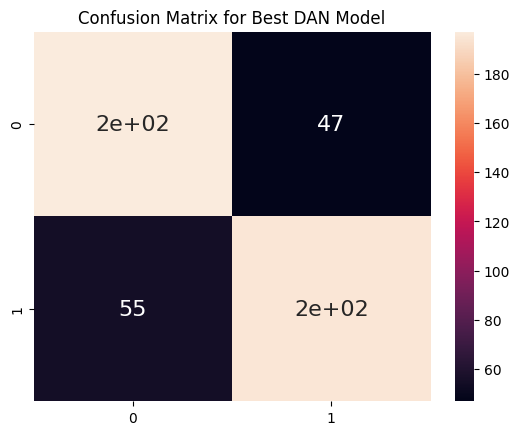

In [25]:
class_label_predictions = best_model.predict(X_test_tfidf.toarray()) >= 0.5
cm = confusion_matrix(y_test, class_label_predictions)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}).set_title("Confusion Matrix for Best DAN Model")

## Chapter 6: Write Your Own Page 🖊️

#### View model predictions on an custom review

In [26]:
def predict_review(review_text):
    lemmatized_review = lemmatize_review(review_text)
    review_vector = tfidf_vectorizer.transform([lemmatized_review])
    prediction = best_model.predict(review_vector.toarray())
    if prediction >= 0.5:
        return (prediction[0][0], "Positive")
    else:
        return (prediction[0][0], "Negative")

In [27]:
import ipywidgets as widgets
from IPython.display import display

text_area = widgets.Textarea(
    description='Review:',
    placeholder='Type your review here...',
    layout=widgets.Layout(width='90%', height='50px')
)

button = widgets.Button(description='Predict')

result_label = widgets.Label(value='')
rating_label = widgets.Label(value='')

def on_button_click(b):
    review_text = text_area.value
    prediction, label = predict_review(review_text)
    rating = round(prediction * 5, 2)
    result_label.value = f'Label: {label}, Predicted Sentiment: {prediction}'
    rating_label.value = f'{rating} out of 5'

button.on_click(on_button_click)
display(text_area, button, result_label, rating_label)

Textarea(value='', description='Review:', layout=Layout(height='50px', width='90%'), placeholder='Type your re…

Button(description='Predict', style=ButtonStyle())

Label(value='')

Label(value='')

## Chapter 7: Going Beyond the Page 📓

#### Applying book review sentiment analysis model to movie review data (https://www.cs.cornell.edu/people/pabo/movie-review-data/)

In [28]:
movieReview_filename = os.path.join(os.getcwd(), "data", "movie_reviews.csv")
df_movies = pd.read_csv(movieReview_filename)
print(df_movies.head)
print(df_movies.shape)

<bound method NDFrame.head of                                                  Review  Positive Review
0     bad . bad . \nbad . \nthat one word seems to p...            False
1     isn't it the ultimate sign of a movie's cinema...            False
2     " gordy " is not a movie , it is a 90-minute-l...            False
3     disconnect the phone line . \ndon't accept the...            False
4     when robert forster found himself famous again...            False
...                                                 ...              ...
1995  one of the funniest carry on movies and the th...             True
1996  i remember making a pact , right after `patch ...             True
1997  barely scrapping by playing at a nyc piano bar...             True
1998  if the current trends of hollywood filmmaking ...             True
1999  capsule : the director of cure brings a weird ...             True

[2000 rows x 2 columns]>
(2000, 2)


In [29]:
X_movies = df_movies["Review"]
y_movies = df_movies["Positive Review"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_movies, y_movies)

In [30]:
tfidf_movie_vectorizer = TfidfVectorizer()
tfidf_movie_vectorizer.fit(X_movies)
Xm_train_tfidf = tfidf_movie_vectorizer.transform(Xm_train)
Xm_test_tfidf = tfidf_movie_vectorizer.transform(Xm_test)
movie_vocabulary_size = len(tfidf_movie_vectorizer.vocabulary_)

In [31]:
nn_movie_model = create_deep_averaging_neural_network(movie_vocabulary_size, True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                2538240   
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 2,540,865
Trainable params: 2,540,865
Non-trainable params: 0
_________________________________________________________________


In [32]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.03)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_movie_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [33]:
m_training_history = train_dan_model(nn_movie_model, Xm_train_tfidf.toarray(), ym_train, training_epochs, True)

Epoch [5/ 45], Loss: 0.6929, Accuracy: 0.5183, Val_loss: 0.6917, Val_accuracy: 0.5933
Epoch [10/ 45], Loss: 0.6881, Accuracy: 0.5850, Val_loss: 0.6887, Val_accuracy: 0.7033
Epoch [15/ 45], Loss: 0.6798, Accuracy: 0.6467, Val_loss: 0.6819, Val_accuracy: 0.6167
Epoch [20/ 45], Loss: 0.6696, Accuracy: 0.6900, Val_loss: 0.6759, Val_accuracy: 0.7700
Epoch [25/ 45], Loss: 0.6419, Accuracy: 0.7667, Val_loss: 0.6551, Val_accuracy: 0.7033
Epoch [30/ 45], Loss: 0.5948, Accuracy: 0.8100, Val_loss: 0.6193, Val_accuracy: 0.7133
Epoch [35/ 45], Loss: 0.4987, Accuracy: 0.8517, Val_loss: 0.5499, Val_accuracy: 0.7900
Epoch [40/ 45], Loss: 0.3637, Accuracy: 0.8942, Val_loss: 0.5545, Val_accuracy: 0.6867
Epoch [45/ 45], Loss: 0.3403, Accuracy: 0.8683, Val_loss: 0.4046, Val_accuracy: 0.8333
Elapsed time: 7.57s


In [34]:
loss, accuracy = nn_movie_model.evaluate(Xm_test_tfidf.toarray(), ym_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

16/16 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7760
Test Loss: 0.4803
Test Accuracy: 0.7760


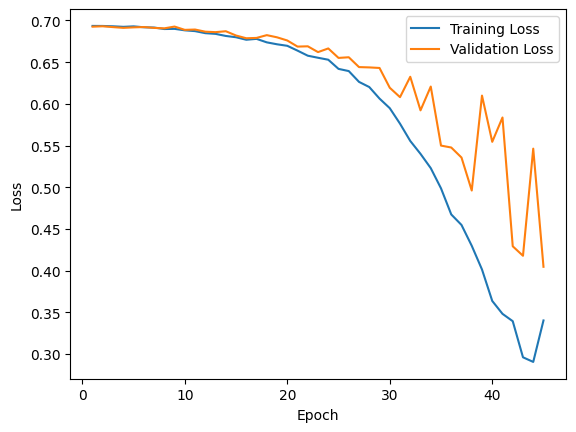

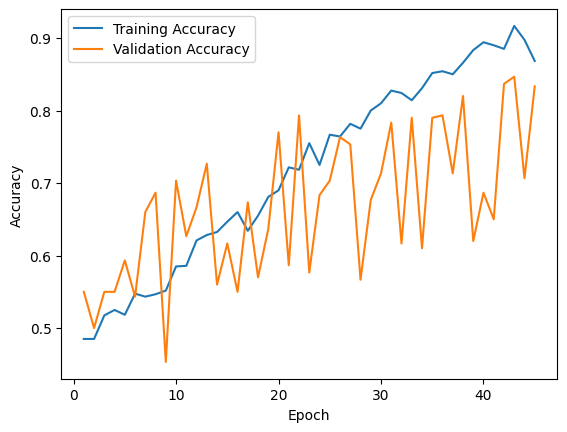

In [35]:
plot_loss_accuracy_over_epochs(training_epochs, m_training_history)

In [36]:
best_model.save('hamlet_ai.h5')

# Epilogue

In this ML project we built a robust sentiment analysis model. Using the Book Review dataset we perform exploratory data analysis and implement a word vectorizer and deep averaging neural network tuned for highest accuracy. 

Our best model performs with an accuracy of 0.800 and a loss of 0.432. 

Through instance validation and applying our model to another dataset, Cornell's Movie Reviews, we prove that our model can generalize to new examples.

Our model accuracy still has room for improvement. For future improvements, we can consider gathering more training data to allow for higher training accuracy. We could also consider combining the book dataset and movie dataset. Lastly we can continue investigating different word vectorization implementations to better represent input data. 

# The End